# Forecasting Time Series Data using Auto_ARIMA

In [1]:
import pandas as pd
from pathlib import Path
import pmdarima as pm
from pmdarima import model_selection
import matplotlib.pyplot as plt



In [55]:
milk_file = Path('../../datasets/Ch10/milk_production.csv')

milk = pd.read_csv(milk_file, 
                   index_col='month', 
                   parse_dates=True)

In [53]:
train, test = model_selection.train_test_split(milk, test_size=0.15)

In [54]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf',
                           stepwise=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  142
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -445.404
Date:                            Sun, 13 Feb 2022   AIC                            896.808
Time:                                    02:18:58   BIC                            905.387
Sample:                                         0   HQIC                           900.294
                                            - 142                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2779      0.084     -3.293      0.001      -0.443      -0.112
ma.S.L12      -0.6199      0.086     -7.200      0.000      -0.789      -0.451
sigma2        55.8091      5.854      9.533      0.000      44.335      67.283
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                38.42
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.85
Prob(H) (two-sided):                  0.70   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=902.008, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=943.069, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=909.756, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=896.808, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=931.844, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=898.753, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=898.737, Time=0.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=909.813, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=905.237, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=898.634, Time=0.23 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=898.466, Time=0.20 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=897.205, Time=0.15 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=900.331, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   

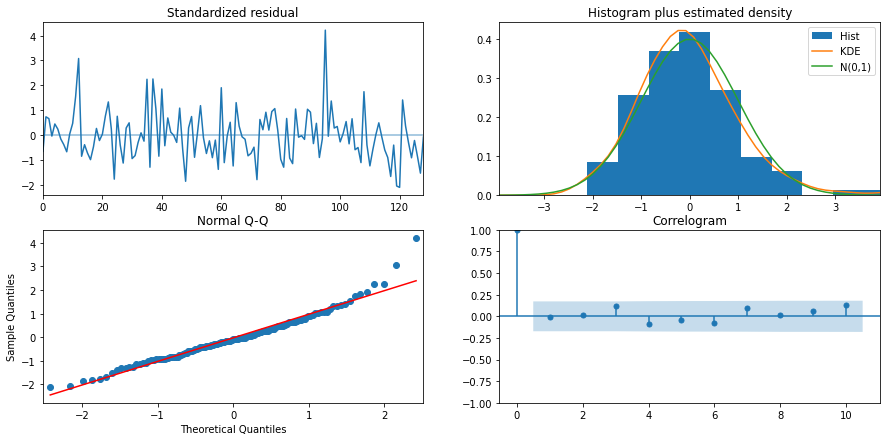

In [22]:
auto_model.plot_diagnostics(figsize=(15,7)); plt.show()

In [28]:
auto_model.scoring

'mse'

In [40]:
auto_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

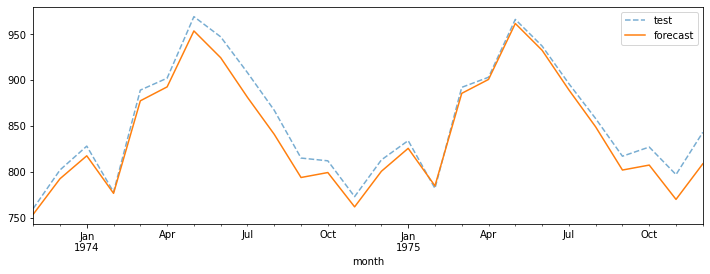

In [27]:
n = test.shape[0]
index = test.index
ax = test.plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(auto_model.predict(n_periods=n), 
          index=index).plot(style='-', ax=ax)
plt.legend(['test', 'forecast']); plt.show()

In [72]:
# n = test.shape[0]
# mape_m = mape(test, model.forecast(n))
# mape_auto = mape(test, auto_model.predict(n))
# rmse_m = rmse(test.values.ravel(), model.forecast(n))
# rmse_auto = rmse(test.values.ravel(), auto_model.predict(n))
# print(f'''
# MAPE: manual = {mape_m}, auto = {mape_auto}
# RMSE: manual = {rmse_m}, auto = {rmse_auto}
# AIC : manual = {model.aic}, auto = {auto_model.aic()}
# ''')

### There is more

In [105]:
from pmdarima import datasets


In [153]:
pm.__version__

'1.8.4'

In [120]:
from pmdarima.arima.utils import ndiffs, nsdiffs

# ADF test:
n_adf = ndiffs(milk, test='adf') 
# KPSS test (auto_arima default):
n_kpss = ndiffs(milk, test='kpss') 
# PP test:
n_pp = ndiffs(milk, test='pp')  

In [121]:
print(f'''
differencing (d) term using:
    ADF: {n_adf}
    KPSS: {n_kpss}
    PP: {n_pp}
''')


differencing (d) term using:
    ADF: 0
    KPSS: 1
    PP: 0



In [133]:
# OCSB test
max_D = nsdiffs(milk, test='ocsb', m=12, max_D=12) 

In [154]:
print(f'''
Seasonal differencing (D) term: {max_D}
''')


Seasonal differencing (D) term: 1



In [159]:
model = pm.auto_arima(milk, 
                      seasonal=True,
                      with_intercept=True,
                      d=1,
                      max_d=2,
                      start_p=0, max_p=2,
                      start_q=0, max_q=2,
                      m=12,
                      D=1,
                      max_D=2,
                      start_P=0, max_P=2,
                      start_Q=0, max_Q=2,
                      information_criterion='aic',
                      stepwise=False,
                      out_of_sample_siz=25,
                      test = 'kpss',
                      score='mape',
                      trace=True)

 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=1121.939, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=1074.277, Time=0.16 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=1076.083, Time=0.31 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=1091.098, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=1076.128, Time=0.14 sec
 ARIMA(0,1,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1082.886, Time=0.33 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=1077.394, Time=0.47 sec
 ARIMA(0,1,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=1116.950, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1068.286, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=1069.963, Time=0.45 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=1084.109, Time=0.20 sec
 ARIMA(0,1,1)(1,1,1)[12] intercept   : AIC=1070.017, Time=0.26 sec
 ARIMA(0,1,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,1

In [160]:
model.out_of_sample_size

0

In [161]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.100
Date:                              Sun, 13 Feb 2022   AIC                           1068.200
Time:                                      16:36:14   BIC                           1080.374
Sample:                                           0   HQIC                          1073.145
                                              - 168                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0211      0.287     -0.074      0.941      -0.584       0.542
ar.L1         -0.2254      0.079     -2.837      0.005      -0.381      -0.070
ma.S.L12      -0.6193      0.071     -8.694      0.000      -0.759      -0.480
sigma2        52.6875      5.100     10.332      0.000      42.693      62.682
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

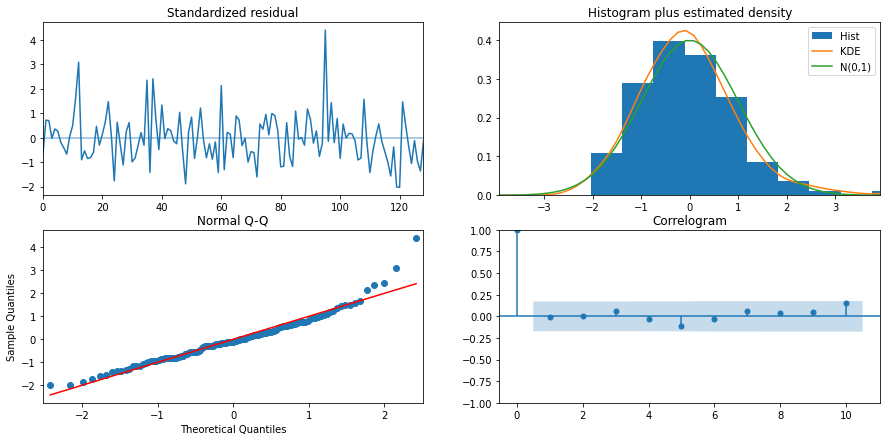

In [49]:
model.plot_diagnostics(figsize=(15,7));plt.show()

# Forecasting Time Series Data using Prophet

In [35]:
from prophet import Prophet
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


milk_file = Path('../../datasets/Ch10/milk_production.csv')

milk = pd.read_csv(milk_file, parse_dates=['month'])

milk.columns = ['ds', 'y']

In [36]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [37]:
idx = round(len(milk) * 0.85)
idx

143

In [38]:
train_milk = milk[:idx]
test_milk = milk[idx:]
print(train_milk.shape)
print(test_milk.shape)

(143, 2)
(25, 2)


In [82]:
model = (
        Prophet(seasonality_mode='multiplicative')
         .fit(train_milk)
        )

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.63781
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       562.843     0.0483286       651.484           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       566.489   0.000142385        111.47   1.637e-06       0.001      253  LS failed, Hessian reset 
     199       566.761   0.000476663       82.0237           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       568.034   0.000281645       236.354   2.178e-06       0.001      450  LS failed, Hessian reset 
     299       568.124   0.000858039       210.683           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       568.265   0.000143229       203.491   1.888e-06       0.001      501  LS failed, Hessian rese

In [69]:
future = model.make_future_dataframe(len(test_milk), freq='MS')

In [72]:
forecast = model.predict(future)

In [73]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')

In [74]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']

In [164]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [163]:
forecast[cols].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,591.934628,579.728909,603.947683
1,1962-02-01,560.094334,547.201045,572.473135
2,1962-03-01,636.681520,624.651023,649.648371
3,1962-04-01,651.950643,639.627895,663.917537
4,1962-05-01,703.871905,692.241782,715.615559


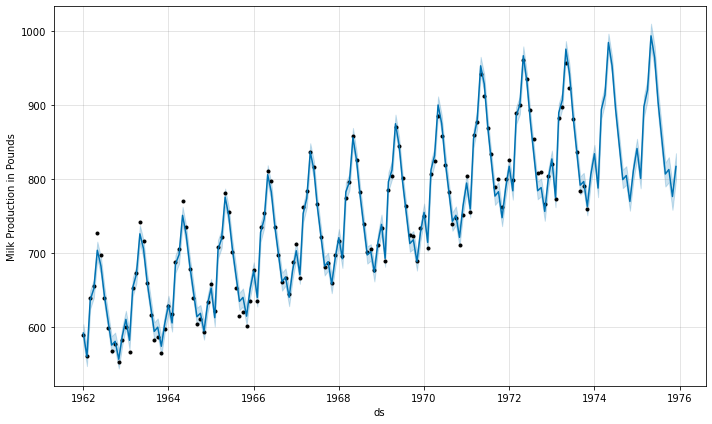

In [161]:
model.plot(forecast, ylabel='Milk Production in Pounds')
plt.show()

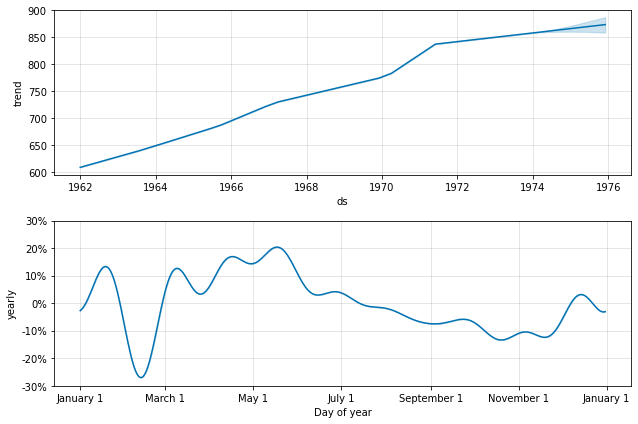

In [77]:
model.plot_components(forecast)
plt.show()

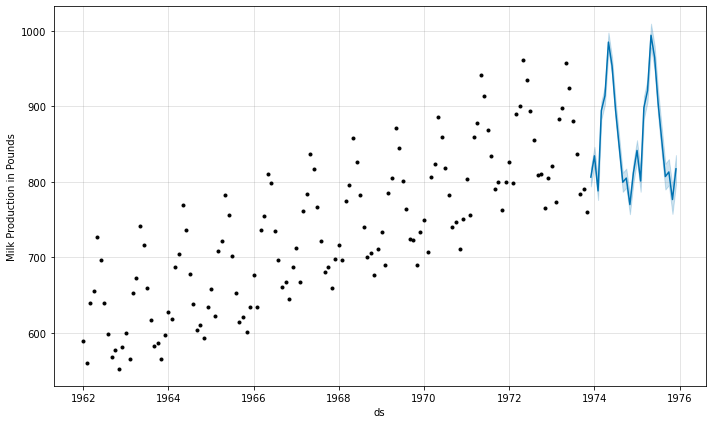

In [168]:
predicted = model.predict(test_milk)
model.plot(predicted, ylabel='Milk Production in Pounds')
plt.show()

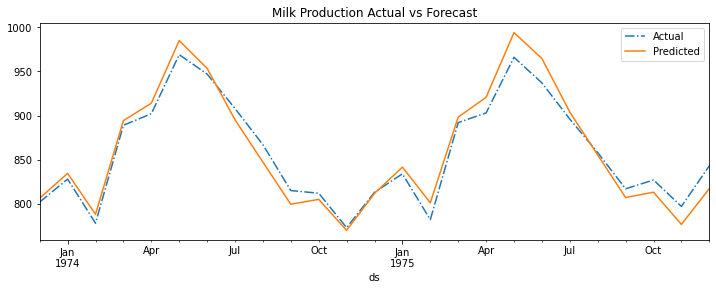

In [79]:
ax = test_milk.plot(x='ds', y='y', 
                    label='Actual', 
                    style='-.', 
                    figsize=(12,4))
predicted.plot(x='ds', y='yhat', 
               label='Predicted', 
               ax=ax)
plt.title('Milk Production Actual vs Forecast')
plt.show()

### Forecasting with Prophet Example

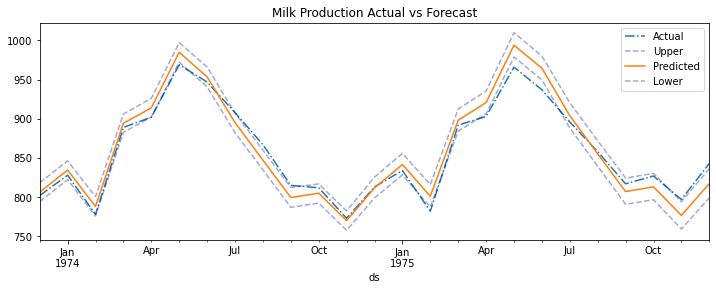

In [80]:
ax = test_milk.plot(x='ds', y='y', 
                    label='Actual', 
                    style='-.', 
                    figsize=(12,4))
predicted.plot(x='ds',y='yhat_upper', 
               label='Upper', 
               ax=ax, 
               color='navy', 
               style='--', alpha=0.35)
predicted.plot(x='ds', y='yhat', 
               label='Predicted', 
               ax=ax)
predicted.plot(x='ds',y='yhat_lower', 
               label='Lower', 
               ax=ax, 
               color='navy', 
               style='--', alpha=0.35)
plt.title('Milk Production Actual vs Forecast'); plt.show()

### How it works


In [132]:
model.changepoints.shape

(25,)

In [155]:
milk.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [154]:
milk.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


In [133]:
model.changepoints

5     1962-06-01
9     1962-10-01
14    1963-03-01
18    1963-07-01
23    1963-12-01
27    1964-04-01
32    1964-09-01
36    1965-01-01
41    1965-06-01
45    1965-10-01
50    1966-03-01
54    1966-07-01
59    1966-12-01
63    1967-04-01
68    1967-09-01
72    1968-01-01
77    1968-06-01
81    1968-10-01
86    1969-03-01
90    1969-07-01
95    1969-12-01
99    1970-04-01
104   1970-09-01
108   1971-01-01
113   1971-06-01
Name: ds, dtype: datetime64[ns]

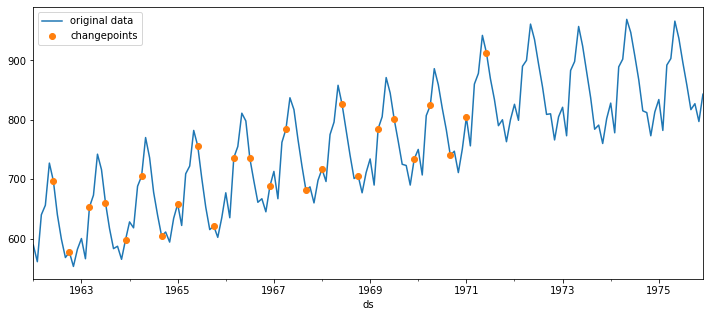

In [146]:
ax = milk.set_index('ds').plot(figsize=(12,5))
milk.set_index('ds').loc[model.changepoints].plot(style='o', ax=ax)
plt.legend(['original data', 'changepoints'])
plt.show()

### There is more

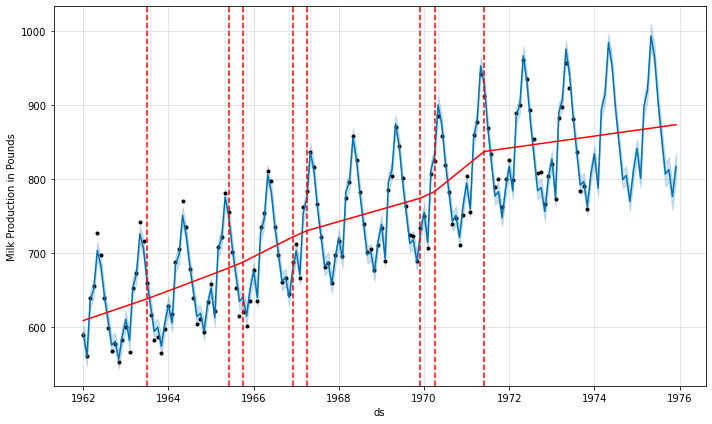

In [169]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast, ylabel='Milk Production in Pounds')
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

**Logistic Growth**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.62299
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       332.637   3.49145e-07       103.319      0.2772           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       332.637   9.42909e-09       98.1949      0.7554      0.7554      149   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


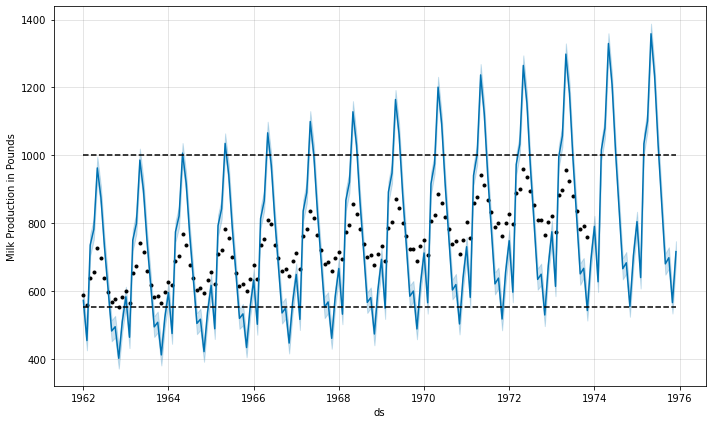

In [202]:
train = train_milk.copy()
train['cap'] = 1000
train['floor']=train['y'].min()
model = (
        Prophet(seasonality_mode='multiplicative', growth='logistic')
         .fit(train)
        )

future = model.make_future_dataframe(len(test_milk), freq='MS')
future['cap']=1000
future['floor']=train['y'].min()
forecast = model.predict(future)
model.plot(forecast, ylabel='Milk Production in Pounds')
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

# Forecasting Multivariate Time Series Data using VAR

In [35]:
import pandas_datareader.data as web
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [216]:
start = "01-01-2000"
end = "01-31-2022"

economic_df = web.FredReader(symbols=["FEDFUNDS", "unrate", "T30YIEM"], 
                            start=start, end=end).read()
inflation = web.FredReader(symbols=["FPCPITOTLZGUSA "], 
                        start=start, end=end).read()
# unemp_df = web.FredReader(symbols=["unrate"], 
#                           start=start, end=end).read()

In [217]:
economic_df.head()

,FEDFUNDS,unrate,T30YIEM
DATE,,,
2000-01-01,5.45,4.0,NaN
2000-02-01,5.73,4.1,NaN
2000-03-01,5.85,4.0,NaN
2000-04-01,6.02,3.8,NaN
2000-05-01,6.27,4.0,NaN


In [218]:
economic_df.tail()

,FEDFUNDS,unrate,T30YIEM
DATE,,,
2021-09-01,0.08,4.7,2.24
2021-10-01,0.08,4.6,2.35
2021-11-01,0.08,4.2,2.38
2021-12-01,0.08,3.9,2.27
2022-01-01,0.08,4.0,2.24


In [219]:
economic_df.isna().sum()

FEDFUNDS      0
unrate        0
T30YIEM     121
dtype: int64

In [220]:
economic_df.shape

(265, 3)

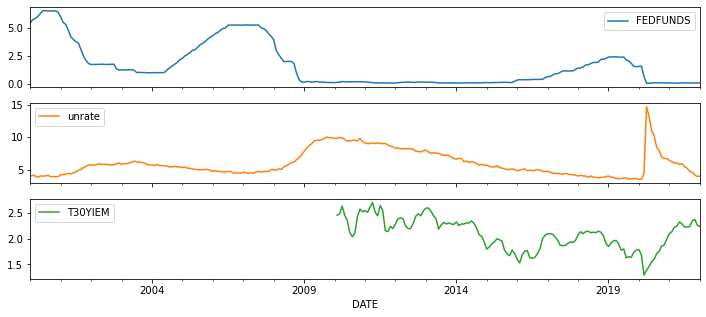

In [221]:
economic_df.plot(subplots=True, figsize=(12,5)); plt.show()

In [182]:
df_mul_scaled = economic_df.divide(economic_df.iloc[0]).copy()
for column in df_mul_scaled.columns:
    d = df_mul_scaled[column]
    df_mul_scaled[column] = ((d - d.min()) / 
                             (d.max() - d.min()))

In [183]:
df_mul_scaled.describe()

,FEDFUNDS,unrate,CPIAUCSL
count,505.000000,505.000000,505.000000
mean,0.230944,0.242857,0.480484
std,0.213397,0.157465,0.263463
min,0.000000,0.000000,0.000000
25%,0.048294,0.125000,0.257437
50%,0.215748,0.205357,0.478589
75%,0.340157,0.339286,0.722762
max,1.000000,1.000000,1.000000


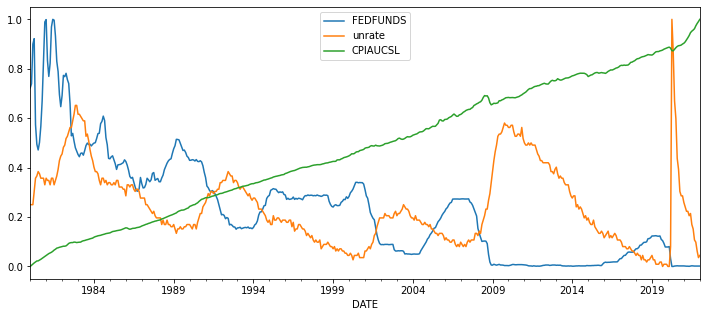

In [184]:
df_mul_scaled.plot(subplots=False, figsize=(12,5)); plt.show()

In [229]:
print(kpss(economic_df['FEDFUNDS'])[1])
print(kpss(economic_df['unrate'])[1])
print(kpss(economic_df['T30YIEM'].dropna())[1])

0.014382109291735617
0.1
0.029036768014309492


/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [230]:
print(adfuller(economic_df['FEDFUNDS'])[1])
print(adfuller(economic_df['unrate'])[1])
print(adfuller(economic_df['T30YIEM'].dropna())[1])

0.0005636767494256557
0.04181375471446343
0.10094584958069353


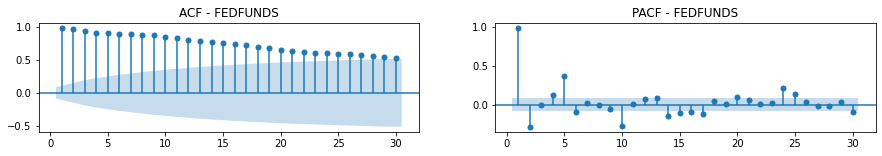

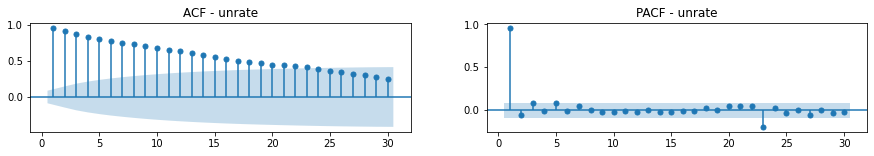

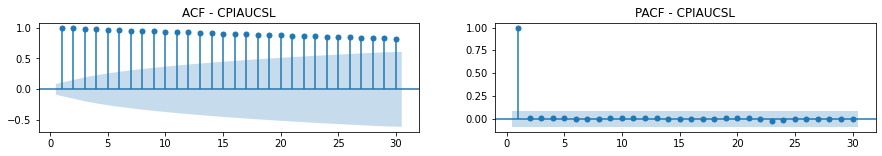

In [187]:
for col in df_mul_scaled.columns:
    fig, ax = plt.subplots(1,2, figsize=(15,2))
    plot_acf(df_mul_scaled[col], zero=False, 
             lags=30, ax=ax[0], title=f'ACF - {col}')
    plot_pacf(df_mul_scaled[col], zero=False, 
              lags=30, ax=ax[1], title=f'PACF - {col}');plt.show()

In [51]:
# gc_res = grangercausalitytests(df_mul_st, 5)

In [189]:
idx = round(len(df_mul_scaled) * 0.90)
train = df_mul_scaled[:idx]
test = df_mul_scaled[idx:]
print(train.shape)
print(test.shape)

(454, 3)
(51, 3)


In [190]:
model = VAR(endog=train)
res = model.select_order(20, trend="c")
res.summary()

/Users/tarekatwan/opt/anaconda3/envs/packt/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,AIC,BIC,FPE,HQIC
0,-11.75,-11.72,7.915e-06,-11.74
1,-28.95,-28.84,2.680e-13,-28.90
2,-29.41,-29.22*,1.684e-13,-29.33
3,-29.46,-29.18,1.601e-13,-29.35
4,-29.50,-29.14,1.537e-13,-29.36
5,-29.54,-29.09,1.476e-13,-29.37*
6,-29.57,-29.03,1.445e-13,-29.35
7,-29.57,-28.95,1.437e-13,-29.33
8,-29.56,-28.85,1.455e-13,-29.28
9,-29.57,-28.78,1.442e-13,-29.26


In [191]:
print(f'AIC: {res.aic} , BIC: {res.bic}, HQ: {res.hqic}, FPE: {res.fpe}')

AIC: 14 , BIC: 2, HQ: 5, FPE: 14


In [192]:
results = model.fit(maxlags=14, ic='aic')

In [193]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 21, Feb, 2022
Time:                     00:53:44
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -28.2286
Nobs:                     440.000    HQIC:                  -28.9541
Log likelihood:           4729.90    FPE:                1.66307e-13
AIC:                     -29.4268    Det(Omega_mle):     1.25727e-13
--------------------------------------------------------------------
Results for equation FEDFUNDS
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.014045         0.005061            2.775           0.006
L1.FEDFUNDS          1.425091         0.047517           29.991           0.000
L1.unrate           -0.107060         0.052133           -2.0

In [142]:
results.params

,FEDFUNDS,unrate,CPALTT01USM657N
const,0.003446,-0.042010,0.479030
L1.FEDFUNDS,1.440073,-0.071549,0.817391
L1.unrate,-0.124211,0.911238,0.055503
L1.CPALTT01USM657N,-0.011689,-0.001868,0.472881
L2.FEDFUNDS,-0.500739,0.050758,-0.889333
L2.unrate,0.070979,0.112719,-0.390352
L2.CPALTT01USM657N,-0.001584,0.005606,-0.193446
L3.FEDFUNDS,0.118952,-0.092396,-0.050505
L3.unrate,-0.009719,0.096817,-0.340378
L3.CPALTT01USM657N,-0.004678,-0.002142,-0.084733


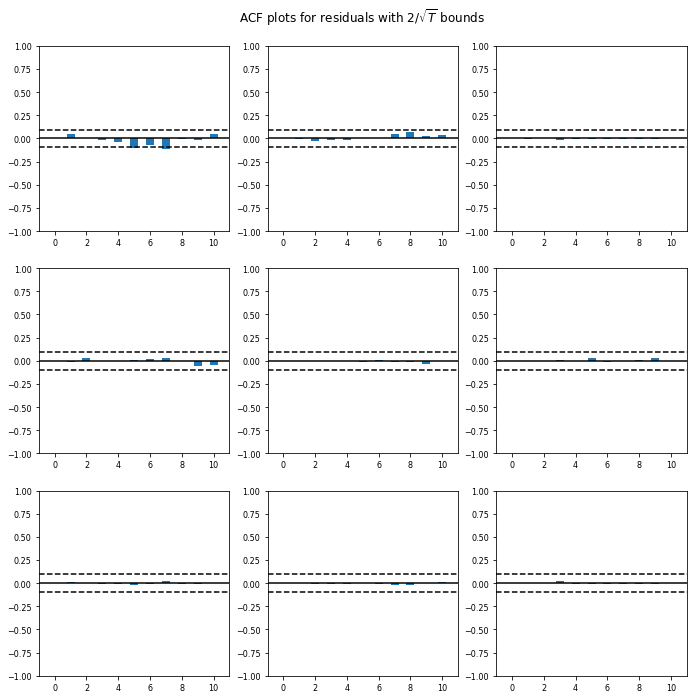

In [194]:
results.plot_acorr();

In [195]:
lag_order = results.k_ar
lag_order

14

In [196]:
df_mul.values[:]

array([[13.82      ,  6.3       ,  1.43415906],
       [14.13      ,  6.3       ,  1.41388175],
       [17.19      ,  6.3       ,  1.52091255],
       ...,
       [ 0.08      ,  4.6       ,  0.83081186],
       [ 0.08      ,  4.2       ,  0.49134275],
       [ 0.08      ,  3.9       ,  0.30725172]])

In [197]:
n = test.shape[0]
forecast = results.forecast(train.values[:], n)

In [198]:
n = test.shape[0]
forecast = results.forecast(df_mul.values[-lag_order:], n)

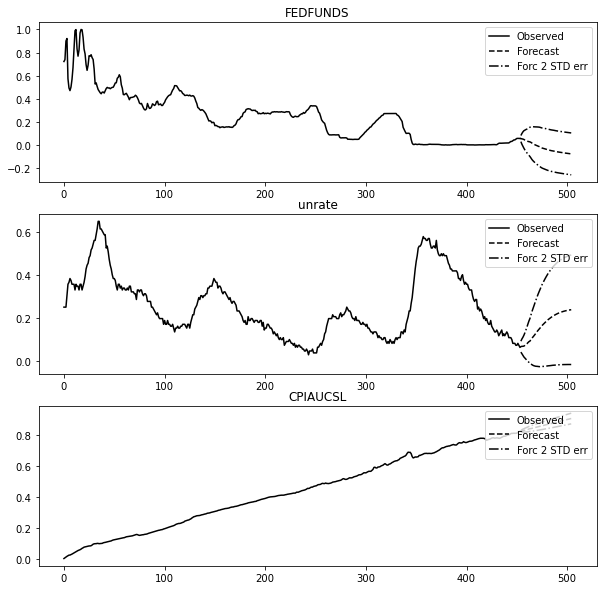

In [199]:
results.plot_forecast(n);

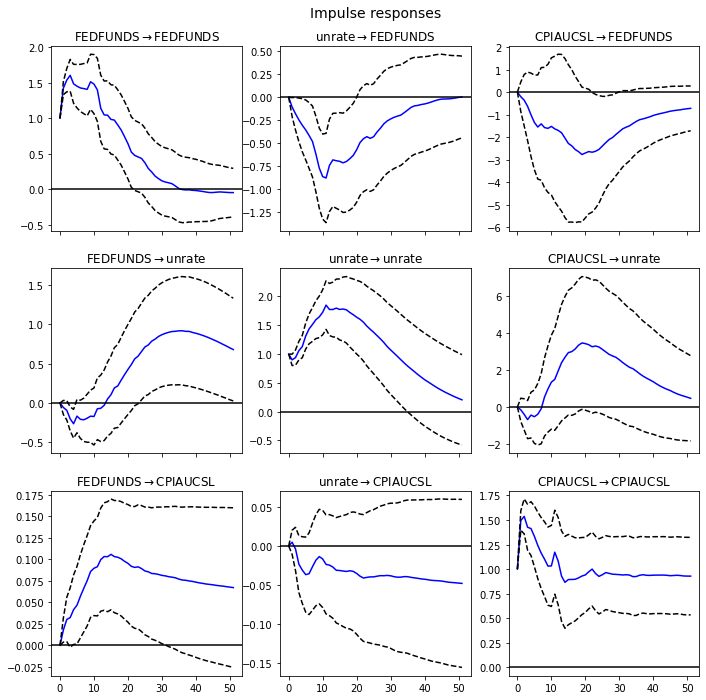

In [200]:
irf = results.irf(n)
irf.plot(orth=False);plt.show()

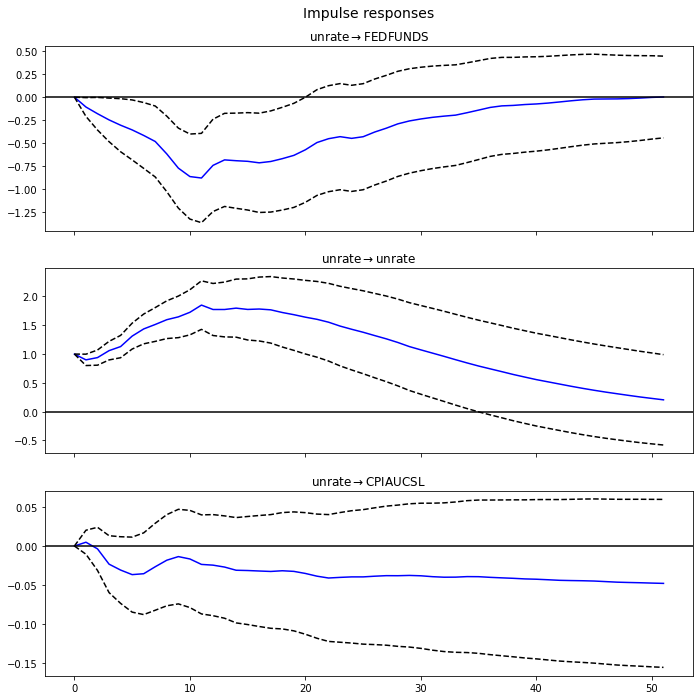

In [201]:
irf.plot(impulse='unrate');plt.show()

<AxesSubplot:xlabel='DATE'>

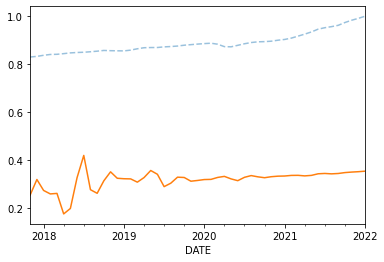

In [202]:
#train['CPALTT01USM657N'].plot(style='--', alpha=0.45).plot()
test['CPIAUCSL'].plot(style='--', alpha=0.45).plot()
pd.Series(forecast[ :, 2], index=test.index).plot()

<AxesSubplot:xlabel='DATE'>

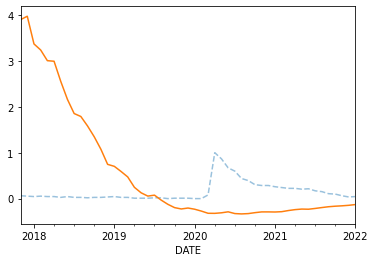

In [203]:
#train['unrate'].plot(style='--', alpha=0.45).plot()
test['unrate'].plot(style='--', alpha=0.45).plot()
pd.Series(forecast[ :, 1], index=test.index).plot()

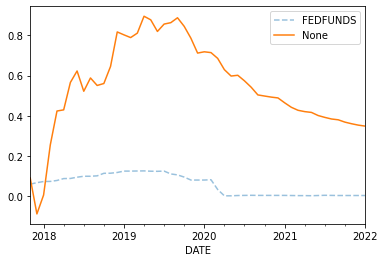

In [204]:
#train['FEDFUNDS'].plot(style='--', alpha=0.45).plot()
test['FEDFUNDS'].plot(style='--', alpha=0.45).plot()
pd.Series(forecast[ :, 0], index=test.index).plot()
plt.legend()

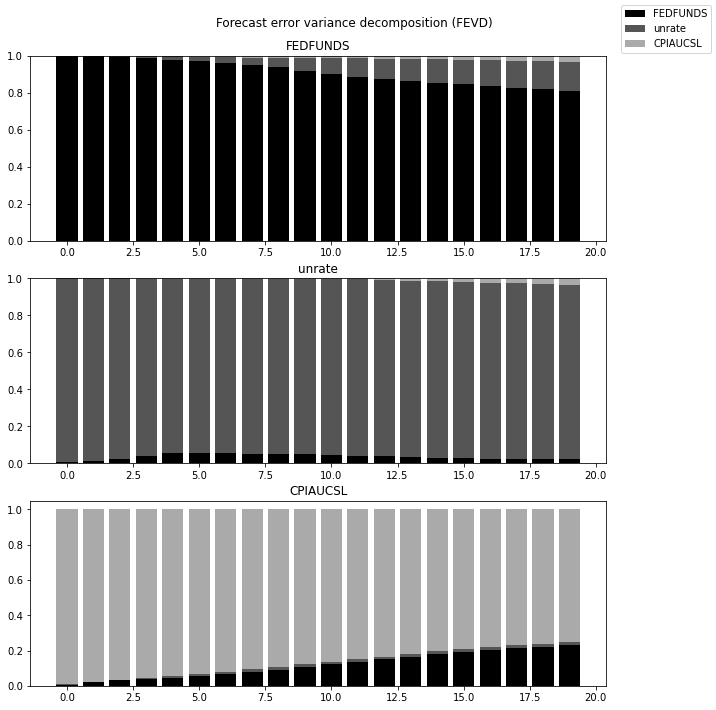

In [205]:
results.fevd(20).plot();plt.show()

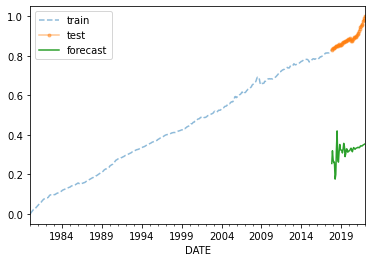

In [207]:
train['CPIAUCSL'].plot(style='--',alpha=0.5)
test['CPIAUCSL'].plot(style='.-', alpha=0.45)
pd.Series(forecast[ :, 2], index=test.index).plot()
plt.legend(['train', 'test', 'forecast'])

### There is more

In [133]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [134]:
res = coint_johansen(df_mul_scaled, -1, 5)

In [135]:
res.lr1

array([18.56903714,  5.90752068,  1.2438907 ])

In [136]:
res.cvt

array([[21.7781, 24.2761, 29.5147],
       [10.4741, 12.3212, 16.364 ],
       [ 2.9762,  4.1296,  6.9406]])

# Forecasting Volatility in Financial Time Series Data with GARCH


In [349]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

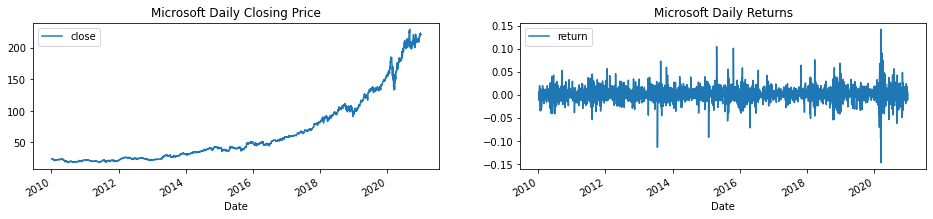

In [407]:
msft_return = msft.pct_change().dropna()
msft_return.columns = ['return']

fig, ax = plt.subplots(1,2, figsize=(16,3))
msft.plot(ax=ax[0])
msft_return.plot(ax=ax[1])
ax[0].title.set_text('Microsoft Daily Closing Price')
ax[1].title.set_text('Microsoft Daily Returns')


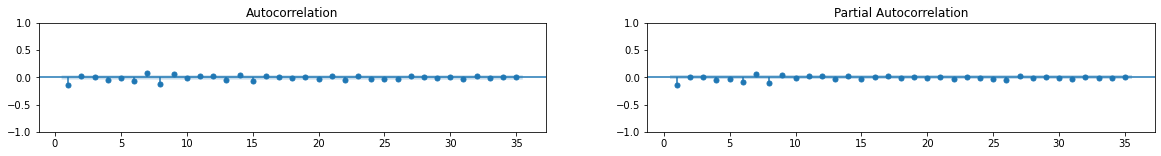

In [477]:
fig, ax = plt.subplots(1,2, figsize=(20,2))
plot_acf(msft_return, zero=False, ax=ax[0])
plot_pacf(msft_return, zero=False, ax=ax[1]); plt.show()

In [361]:
volatility = msft_return.std()
volatility

close    0.015993
dtype: float64

In [362]:
annualized = np.sqrt(252)*volatility
annualized

close    0.253888
dtype: float64

<AxesSubplot:xlabel='Date'>

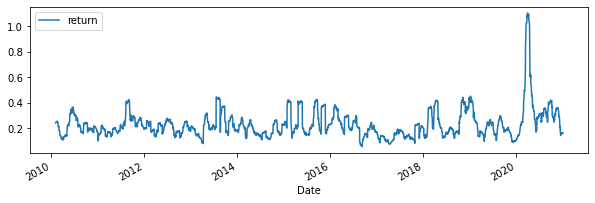

In [451]:
msft_return.rolling(22).apply(lambda x: x.std()*np.sqrt(252)).plot()

In [463]:
train, test = split_data(msft_return, 0.10)

train: 2491 , test: 277


In [464]:
msft_gm = arch_model(train).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0009688463452016e+20
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2630851955.044345
Iteration:      3,   Func. Count:     31,   Neg. LLF: 85543857193550.4
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7105.53750115863
            Iterations: 3
            Function evaluations: 41
            Gradient evaluations: 3


$\omega$, $\alpha$ and $\beta$ are estimated by Maximum Likelihood Method

In [465]:
msft_gm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7105.54
Distribution:                  Normal   AIC:                          -14203.1
Method:            Maximum Likelihood   BIC:                          -14179.8
                                        No. Observations:                 2491
Date:                Tue, Dec 21 2021   Df Residuals:                     2490
Time:                        22:39:39   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0947e-03  2.689e-04      4.071  4.672e-05 [5.677e-04,1.622e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0636e-05  5.076e-12  4.066e+06      0.000 [2.064e-05,2.064e-05]
alpha[1]       0.1000  2.960e-02      3.378  7.294e-04   [4.198e-02,  0.158]
beta[1]        0.8000  2.868e-02     27.893 3.210e-171     [  0.744,  0.856]
============================================================================

Covariance estimator: robust
"""

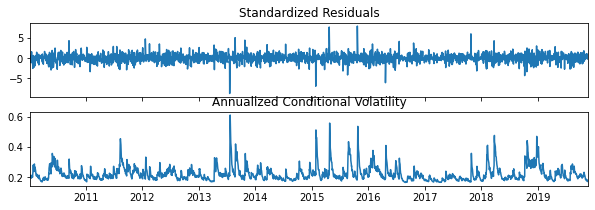

In [466]:
msft_gm.plot(annualize='D');

<AxesSubplot:>

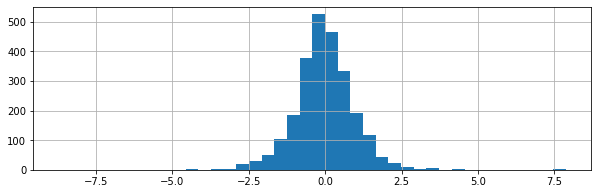

In [529]:
msft_gm.std_resid.hist(bins=40)

In [546]:
msft_vol_forecast = msft_gm.forecast(reindex=False)
print(msft_vol_forecast.variance)

                 h.1
Date                
2019-11-25  0.000121


In [552]:
msft_vol_forecast = msft_gm.forecast(horizon=test.shape[0], 
                                     reindpip install --upgrade tsmoothieex=False)
msft_vol_forecast.variance.shape

(1, 277)

In [561]:
melted_df = pd.melt(msft_vol_forecast.variance)
melted_df.index = test.index
print(melted_df.head())

           variable     value
Date                         
2019-11-26    h.001  0.000121
2019-11-27    h.002  0.000130
2019-11-29    h.003  0.000137
2019-12-02    h.004  0.000144
2019-12-03    h.005  0.000150


<AxesSubplot:xlabel='Date'>

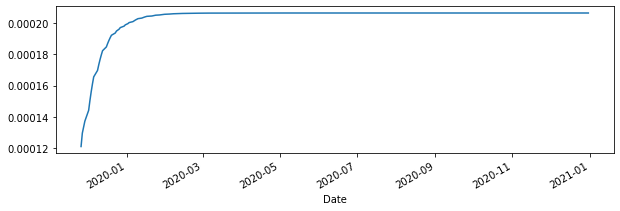

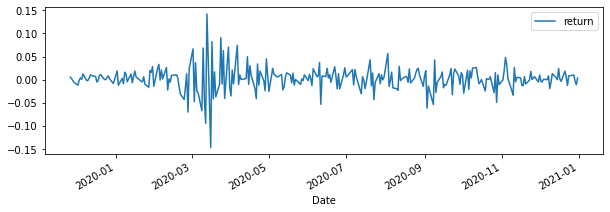

In [562]:
forecast = msft_vol_forecast.variance[-1:].values.ravel()
pd.Series(forecast, index=test.index).plot()
test.plot()

# Forecasting Time Series Data using Kalman Filter Algorithm

In [32]:
from darts import TimeSeries
from darts.models import KalmanFilter, FFT, ExponentialSmoothing, AutoARIMA

Importing plotly failed. Interactive plots will not work.


In [35]:
milk_model = ExponentialSmoothing(seasonal_periods=12)
milk_ts = TimeSeries.from_dataframe(milk.reset_index(), 
                                    time_col='month', value_cols='production', freq='MS')

In [101]:
milk.shape

(168, 1)

In [110]:
test_split = 0.15
l = len(milk)
t_idx = l - round(l*test_split)
milk_train = milk_ts.diff()[ : t_idx]
milk_test = milk_ts.diff()[t_idx : ]
# milk_train, milk_test = split_data(milk_ts.diff(), p)

In [111]:
milk_model.fit(milk_train)
milk_pred = milk_model.predict(len(milk_test), num_samples=1000)

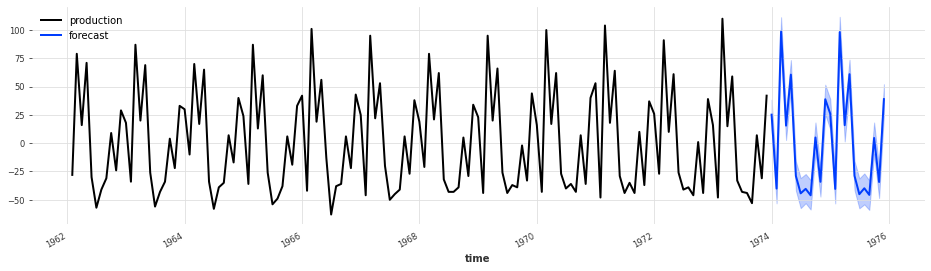

In [112]:
milk_train.plot()
milk_pred.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

In [116]:
milk_filtered = KalmanFilter().filter(milk_ts.diff())
milk_model_filtered = ExponentialSmoothing(seasonal_periods=12)

p = 0.15
# milk_train_filtered, milk_test_filtered = split_data(milk_filtered, p)
milk_train_filtered = milk_filtered[ : t_idx]
milk_test_filtered = milk_filtered[t_idx : ]

In [117]:
milk_model_filtered.fit(milk_train_filtered)
milk_pred_filtered = milk_model_filtered.predict(len(milk_test), num_samples=1000)

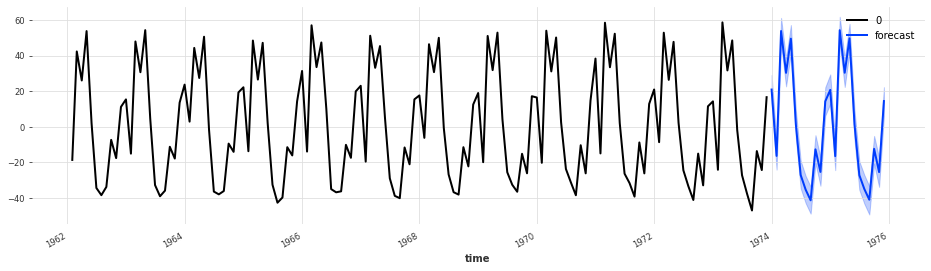

In [118]:
milk_train_filtered.plot()
milk_pred_filtered.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

# Forecasting Time Series with Multiple Seasonal Components using TBATS

In [13]:
from sktime.forecasting.tbats import TBATS

In [14]:
web = Path('../../datasets/Ch9/web_traffic.csv')
weather = Path('../../datasets/Ch9/weather.csv')
elec = Path('../../datasets/Ch9/vic_elec.csv')

In [15]:
electdemand = pd.read_csv(elec, 
                          index_col='Time', 
                          parse_dates=True,
                         usecols=['Time', 'Demand', 'Temperature'])

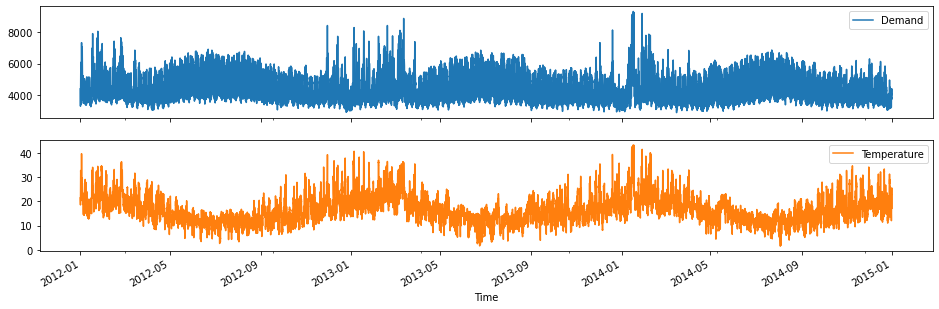

In [16]:
electdemand.plot(subplots=True,figsize=(16, 5)); plt.show()

In [17]:
elect2014 = electdemand['Demand'].loc['2014':]

In [21]:
elect2014 = elect2014.sort_index()

In [45]:
train, test = split_data(elect2014, 0.75)

train: 4380 , test: 13140


In [23]:
model = TBATS(sp=[14, 30.5], n_jobs=1, use_box_cox=False, use_trend=False, use_damped_trend=False)

In [46]:
model = TBATS()

In [47]:
model.fit(train)

TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=None, use_arma_errors=True,
      use_box_cox=None, use_damped_trend=None, use_trend=None)

In [52]:
model.predict(fh=[1,2,3])

ValueError: Must supply freq for datetime value

In [39]:
test.index[0:3].values.tolist()

[1407452400000000000, 1407454200000000000, 1407456000000000000]

In [48]:
model.check_is_fitted()

In [49]:
model.get_fitted_params()

{'a': None, 'i': None, 'c': None}

In [50]:
model.get_test_params()

ModuleNotFoundError: No module named 'pyod'